In [1]:
from IPython import get_ipython
if get_ipython() is not None and __name__ == "__main__":
    notebook = True
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")
else:
    notebook = False

from pathlib import Path
import sys
project_dir = Path.cwd().resolve().parent.parent
sys.path.append(str((project_dir/"code").resolve()))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from parse import get_dg_remove_ratio_frames
import plotting.ratio_plots as ratio_plots
import plotting.ratio_remove_plots as dist_plots
import plotting.perturbation_plots as perturb_plots
import plotting.when_to_retrain_plots as retrain_plots
import plotting.unlearn_plots as unlearn_plots
from typing import List
import json
import math
data_dir = project_dir/"data"
results_dir = data_dir/"results"
figure_dir = results_dir/"images"

In [2]:
plt.rcParams["text.latex.preamble"]=r'\RequirePackage[T1]{fontenc} \RequirePackage[tt=true, type1=true]{libertine} \RequirePackage[varqu]{zi4} \RequirePackage[libertine]{newtxmath}'
def get_default(base:float=6,inc:float=0):
        return{
        'font.size' : base+inc,
        'axes.labelsize' : base+1+inc,
        'legend.fontsize': base+inc,
        'legend.title_fontsize': base+inc,
        'xtick.labelsize' : base+inc,
        # 'xtick.major.size':3.5,
        'ytick.labelsize' : base+inc,
        'figure.titlesize':base+inc,
}
default = get_default()
new_rc_params = {
        'text.usetex': True,
        'figure.dpi':100,
        'savefig.dpi':1000,
        'font.family': 'serif',
         }
new_rc_params.update(default)
fig_width_pt = 506.295  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (math.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

mpl.rcParams.update(new_rc_params)
save = True



In [3]:
# scale = {k:v*3 for k,v in default.items()}
# new_rc_params.update(scale)
# mpl.rcParams.update(new_rc_params)
# figsize = np.array(fig_size)*3
# plt.figure(figsize=figsize)
# x = np.arange(-2*np.pi,2*np.pi,0.01)
# plt.plot(x,np.sin(x),label="hello")
# s = "The quick brown fox jumps over the lazy dog"
# plt.title(r"\textbf{506.295pt}\textbf{506.295pt}$\text{\sc mnist}^{\text{b}}$")
# plt.legend()
# # plt.rcParams["xtick.major.size"]=14
# # plt.savefig(figure_dir/"test_fig.pdf",bbox_inches='tight')

In [4]:
from plotting.combined_plots import plot_ratios_grid,plot_remove_dist,plot_perturbation,plot_unlearning,plot_unlearning_certifiability,plot_unlearning_effectiveness, plot_unlearning_efficiency, get_legend_QoA, plot_unlearning_appendix

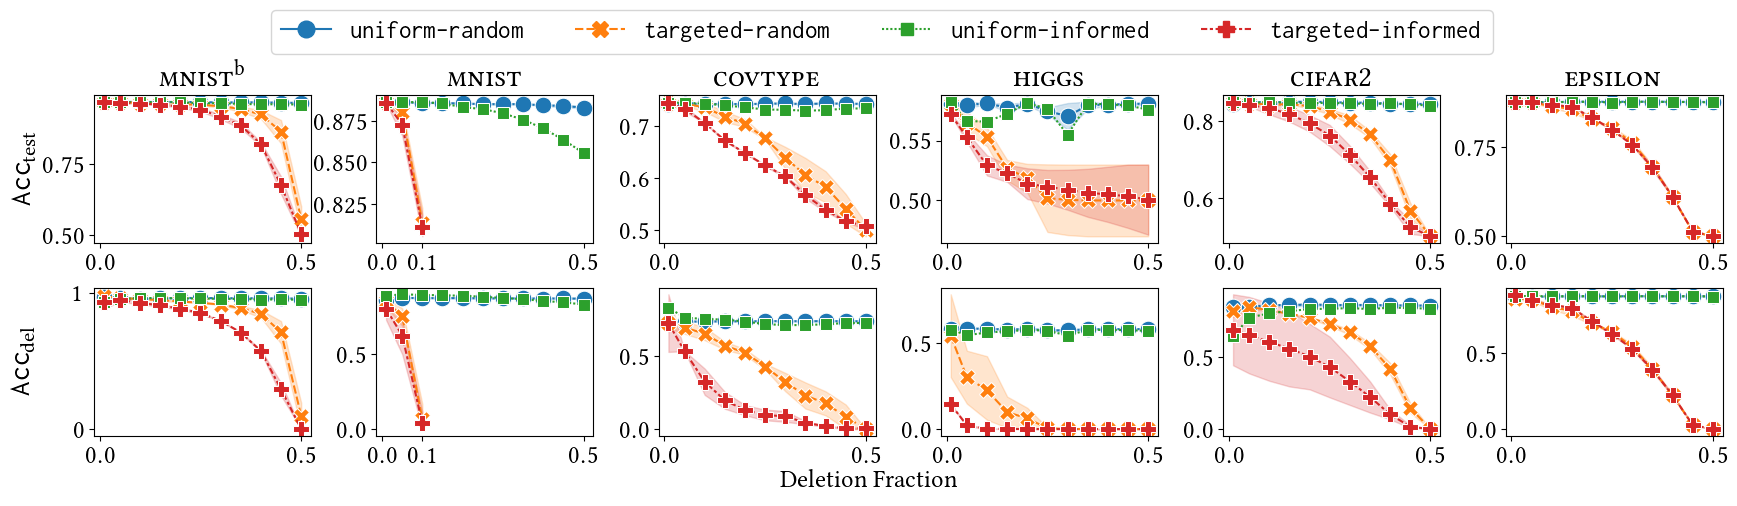

In [11]:
scale = {k:v*3 for k,v in get_default().items()}
scale["legend.markerscale"]=2
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)

plot_ratios_grid(results_dir,save_fig=save,latex=True,extended=False,fig_width_pt=fig_width_pt,scale=3)

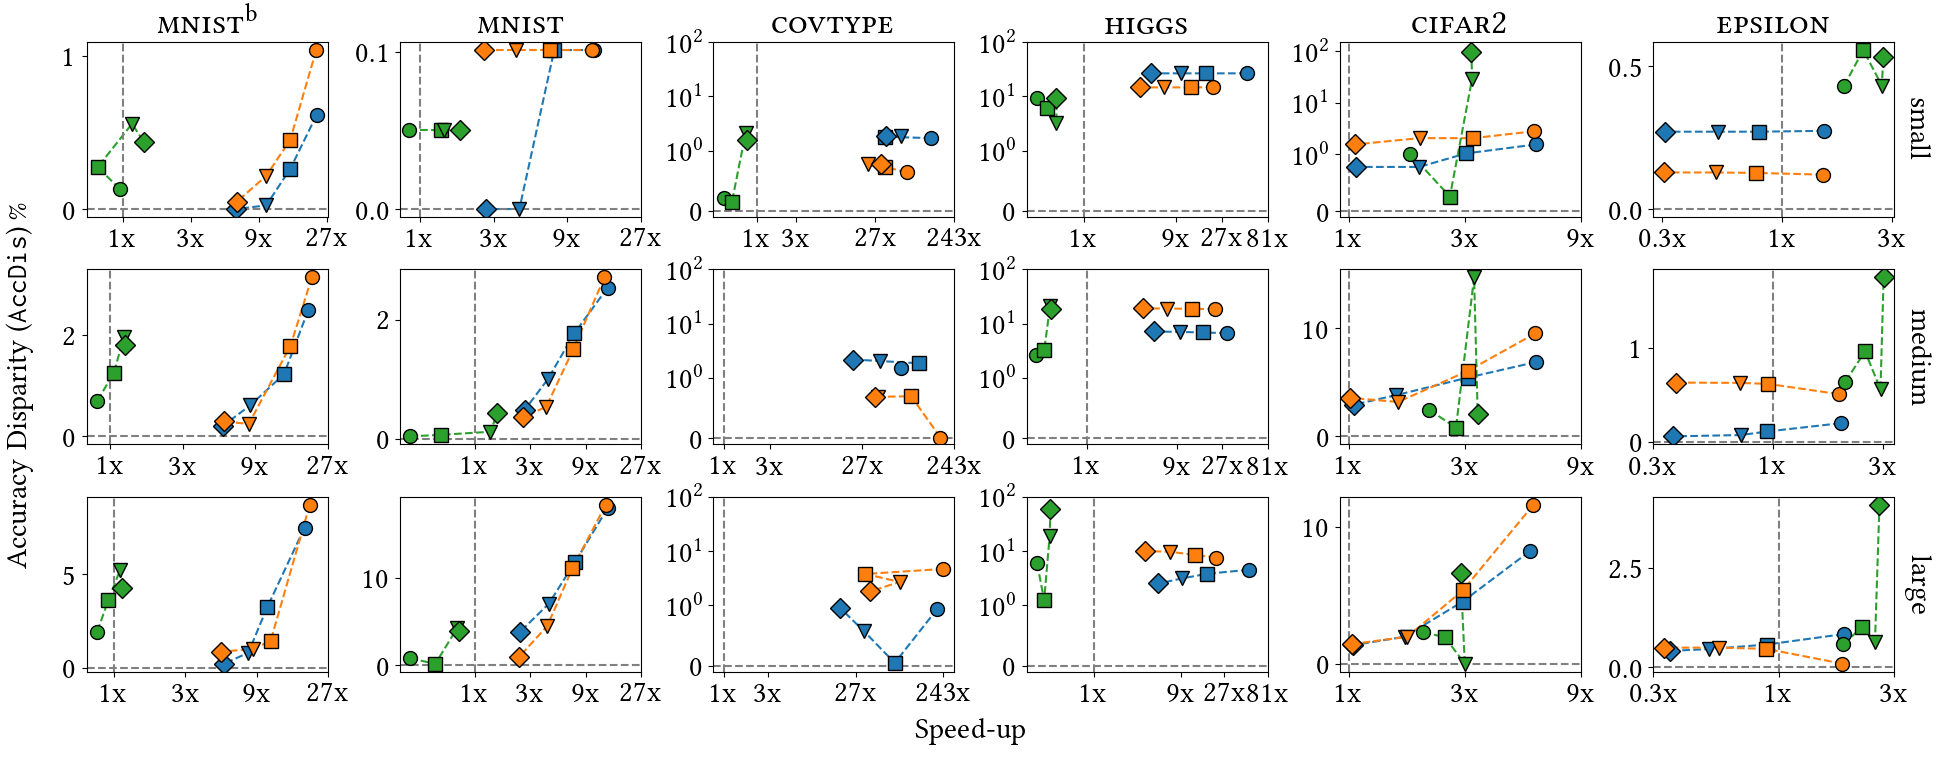

In [7]:
scale = {k:v*3 for k,v in get_default(inc=1).items()}
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)
plot_remove_dist(results_dir,plot_deltagrad=True,save_fig=save,suffix="_selected",latex=True,fig_width_pt=fig_width_pt,scale=3)

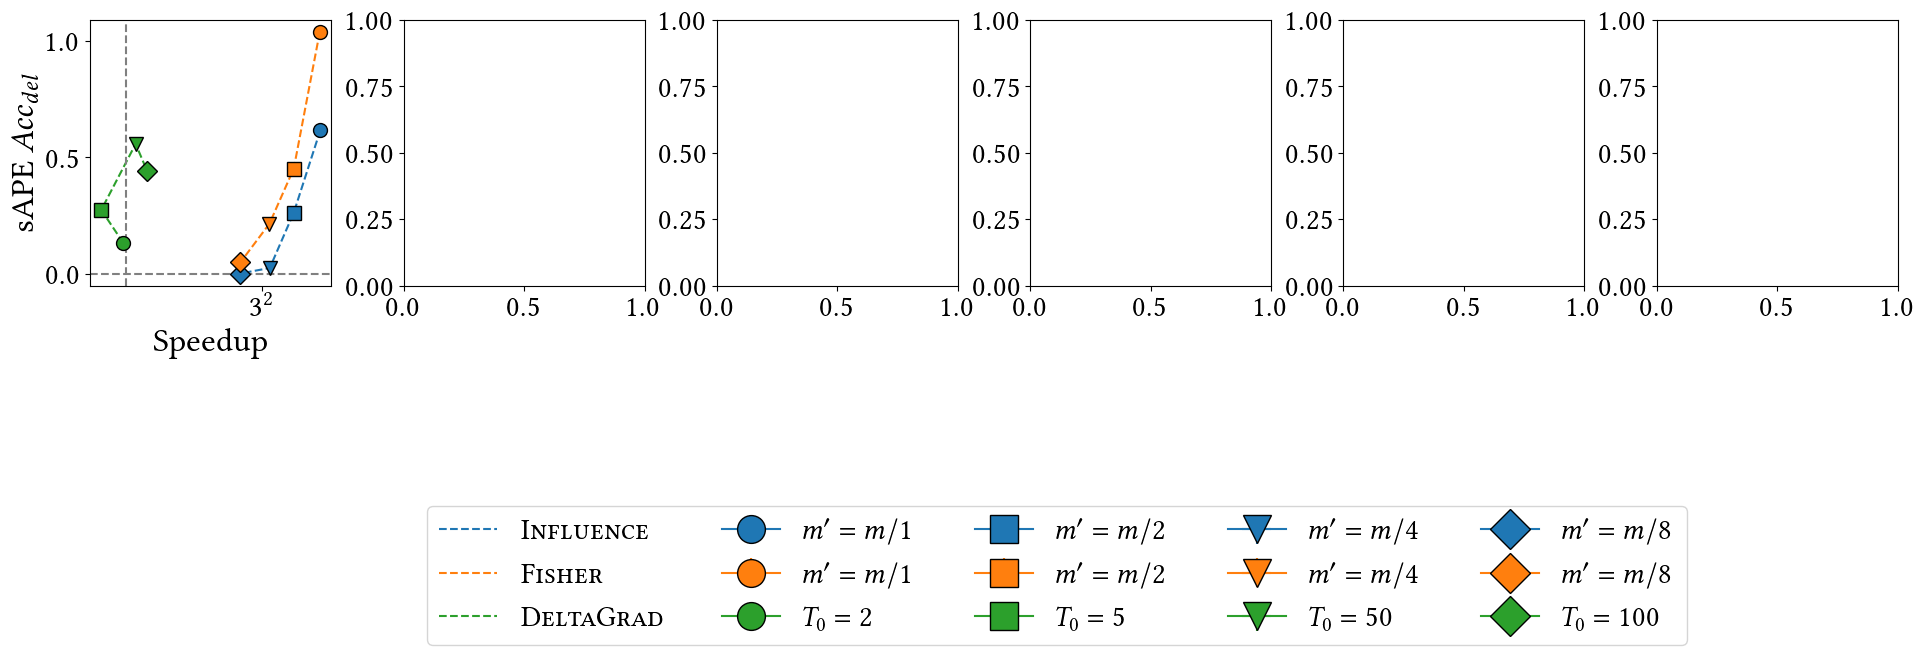

In [8]:
scale = {k:v*3 for k,v in get_default(inc=1).items()}
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)
get_legend_QoA(results_dir,plot_deltagrad=True,save_fig=save,suffix="_selected",latex=True,fig_width_pt=fig_width_pt,scale=3)


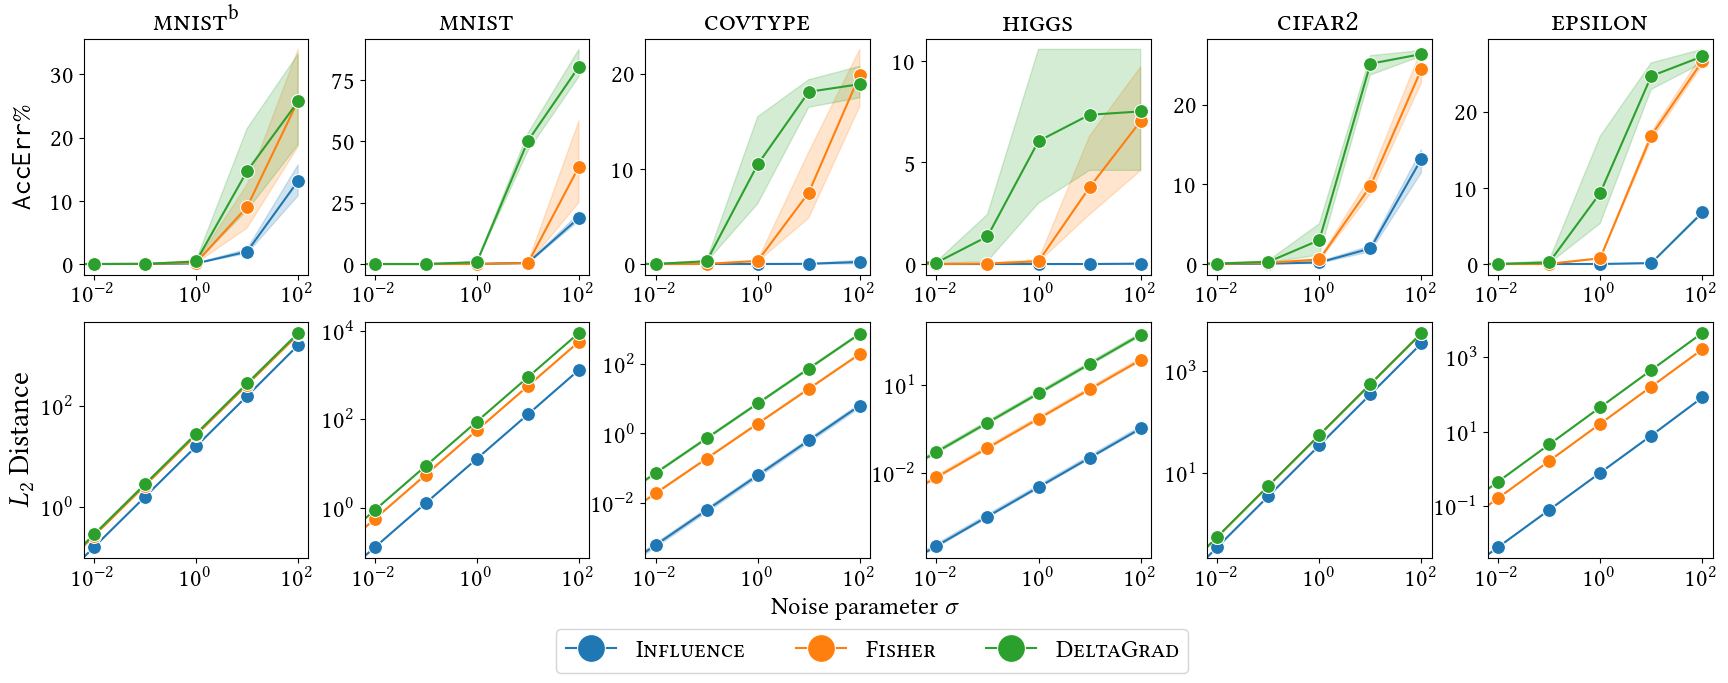

In [9]:
scale = {k:v*3 for k,v in get_default().items()}
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)
plot_perturbation(results_dir,plot_deltagrad=True,save_fig=save,latex=True,fig_width_pt=fig_width_pt,scale=3)

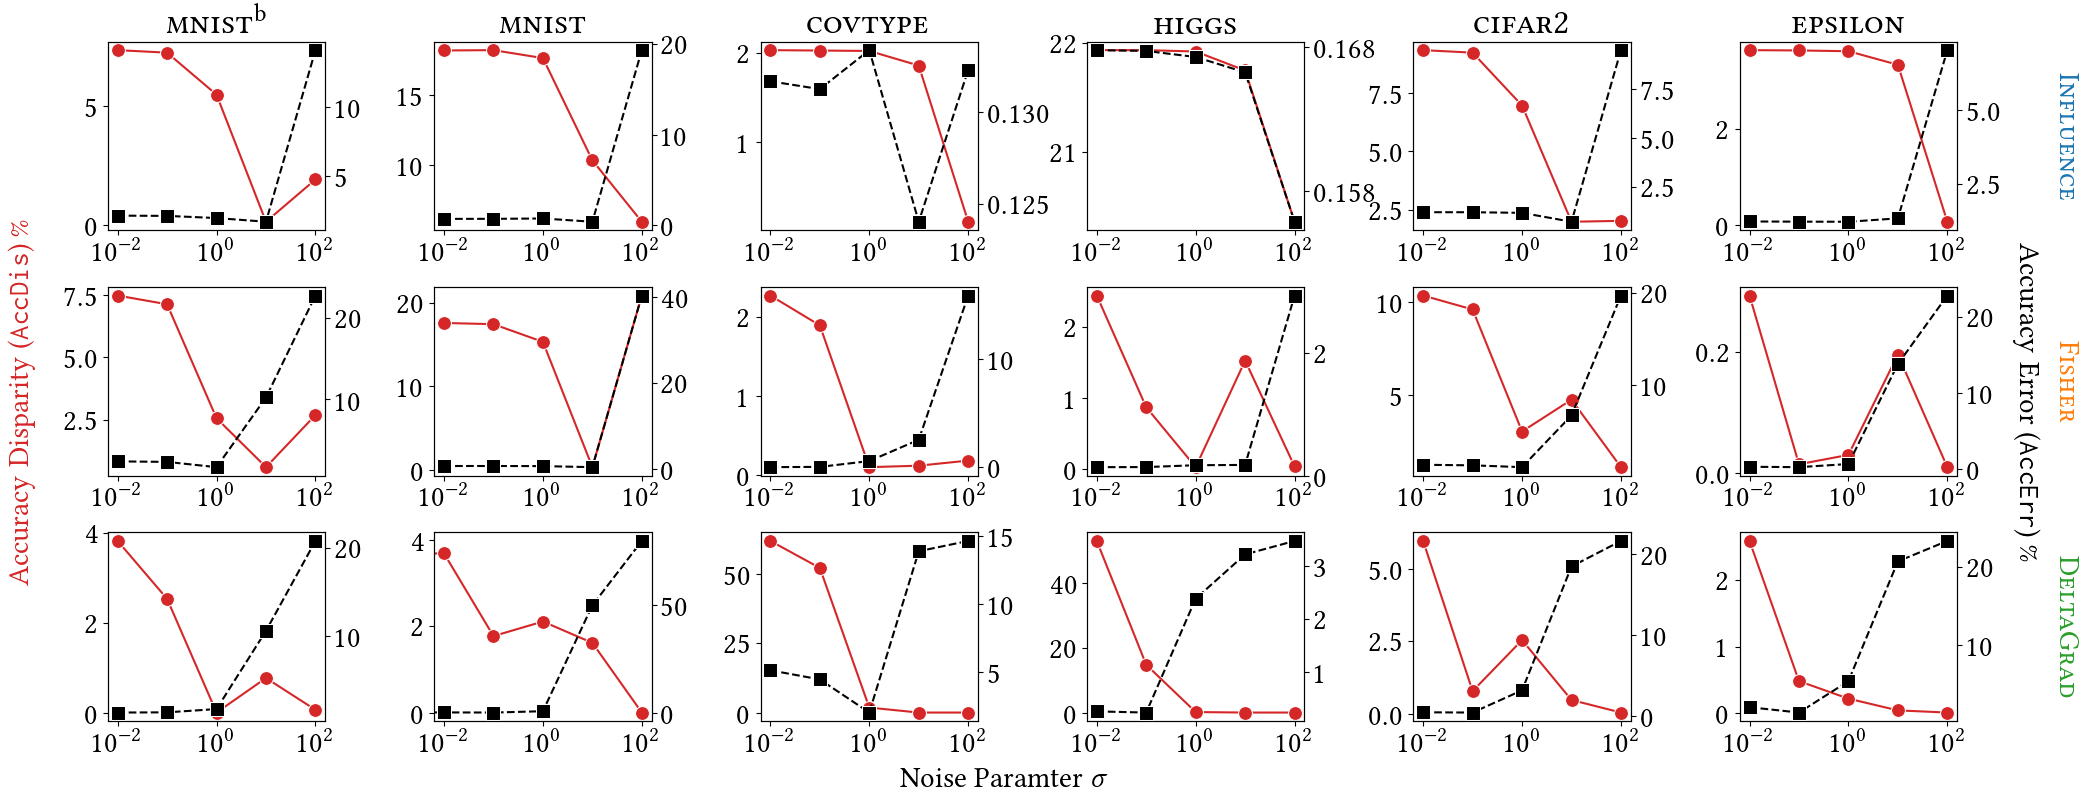

In [11]:
scale = {k:v*3 for k,v in get_default(inc=1).items()}
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)
plot_unlearning(results_dir,plot_deltagrad=True,save_fig=save,latex=True,fig_width_pt=fig_width_pt,scale=3)

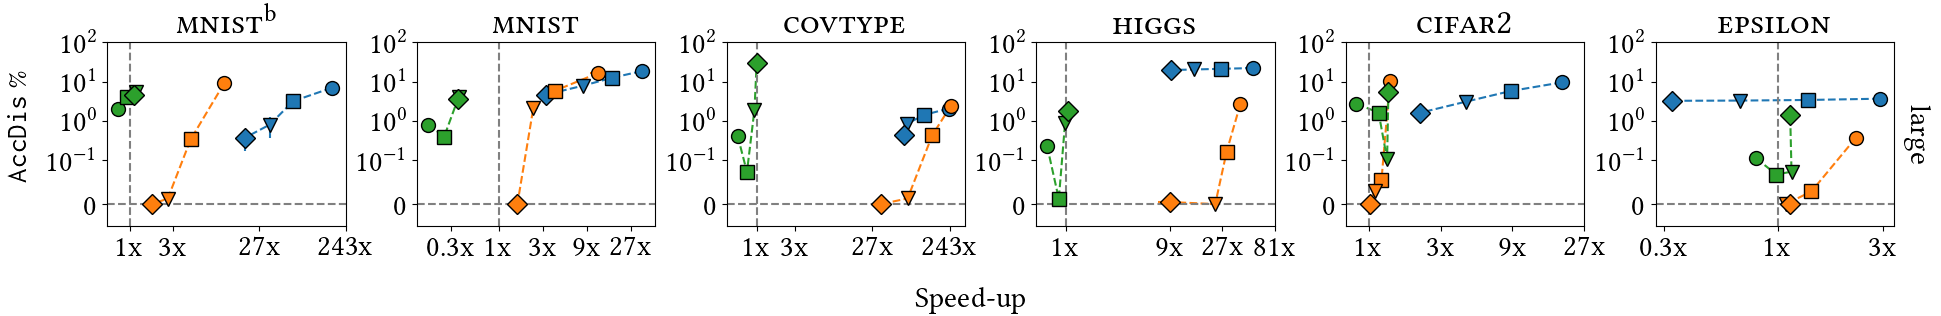

In [13]:
scale = {k:v*3 for k,v in get_default(inc=1).items()}
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)
plot_unlearning_certifiability(results_dir,plot_deltagrad=True,save_fig=save
                         ,suffix="_selected",noise=1,latex=True,fig_width_pt=fig_width_pt,scale=3)

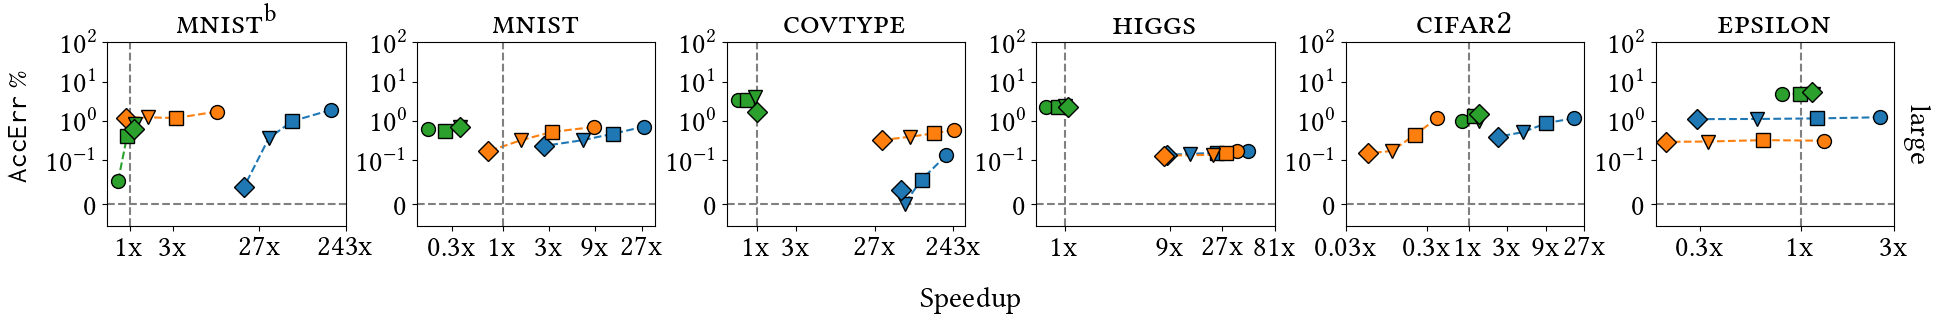

In [14]:
scale = {k:v*3 for k,v in get_default(inc=1).items()}
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)
plot_unlearning_effectiveness(results_dir,plot_deltagrad=True,save_fig=save
                         ,suffix="_selected",noise=1,latex=True,fig_width_pt=fig_width_pt,scale=3)


In [63]:
# mpl.rcParams["font.size"]=20
# mpl.rcParams['xtick.labelsize']=12
# mpl.rcParams['ytick.labelsize']=12
# plot_unlearning_efficiency(results_dir,plot_deltagrad=True,save_fig=save
#                          ,suffix="_selecxted",noise=1,latex=True)
# mpl.rcParams["font.size"]=9
# mpl.rcParams['xtick.labelsize']=9
# mpl.rcParams['ytick.labelsize']=9

In [7]:
for remove_ratio_idx in range(3):
    for noise in [0.01,0.1,1,10,100]:
        scale = {k:v*3 for k,v in get_default(inc=1).items()}
        new_rc_params.update(scale)
        mpl.rcParams.update(new_rc_params)
        plot_unlearning_certifiability(results_dir,plot_deltagrad=True,save_fig=save
                             ,suffix="_selected",noise=noise,latex=True,fig_width_pt=fig_width_pt,scale=3,remove_ratio_idx=remove_ratio_idx)
        plt.close()
        plot_unlearning_effectiveness(results_dir,plot_deltagrad=True,save_fig=save
                             ,suffix="_selected",noise=noise,latex=True,fig_width_pt=fig_width_pt,scale=3,remove_ratio_idx=remove_ratio_idx)
        plt.close()

In [8]:
for remove_ratio_idx in range(3):
    for method in ["guo","gol","deltagrad"]:    
        scale = {k:v*3 for k,v in get_default(inc=1).items()}
        new_rc_params.update(scale)
        mpl.rcParams.update(new_rc_params)
        plot_unlearning_appendix(results_dir,method=method,remove_ratio_idx=remove_ratio_idx,save_fig=save,latex=True,fig_width_pt=fig_width_pt,scale=3)
        plt.close()

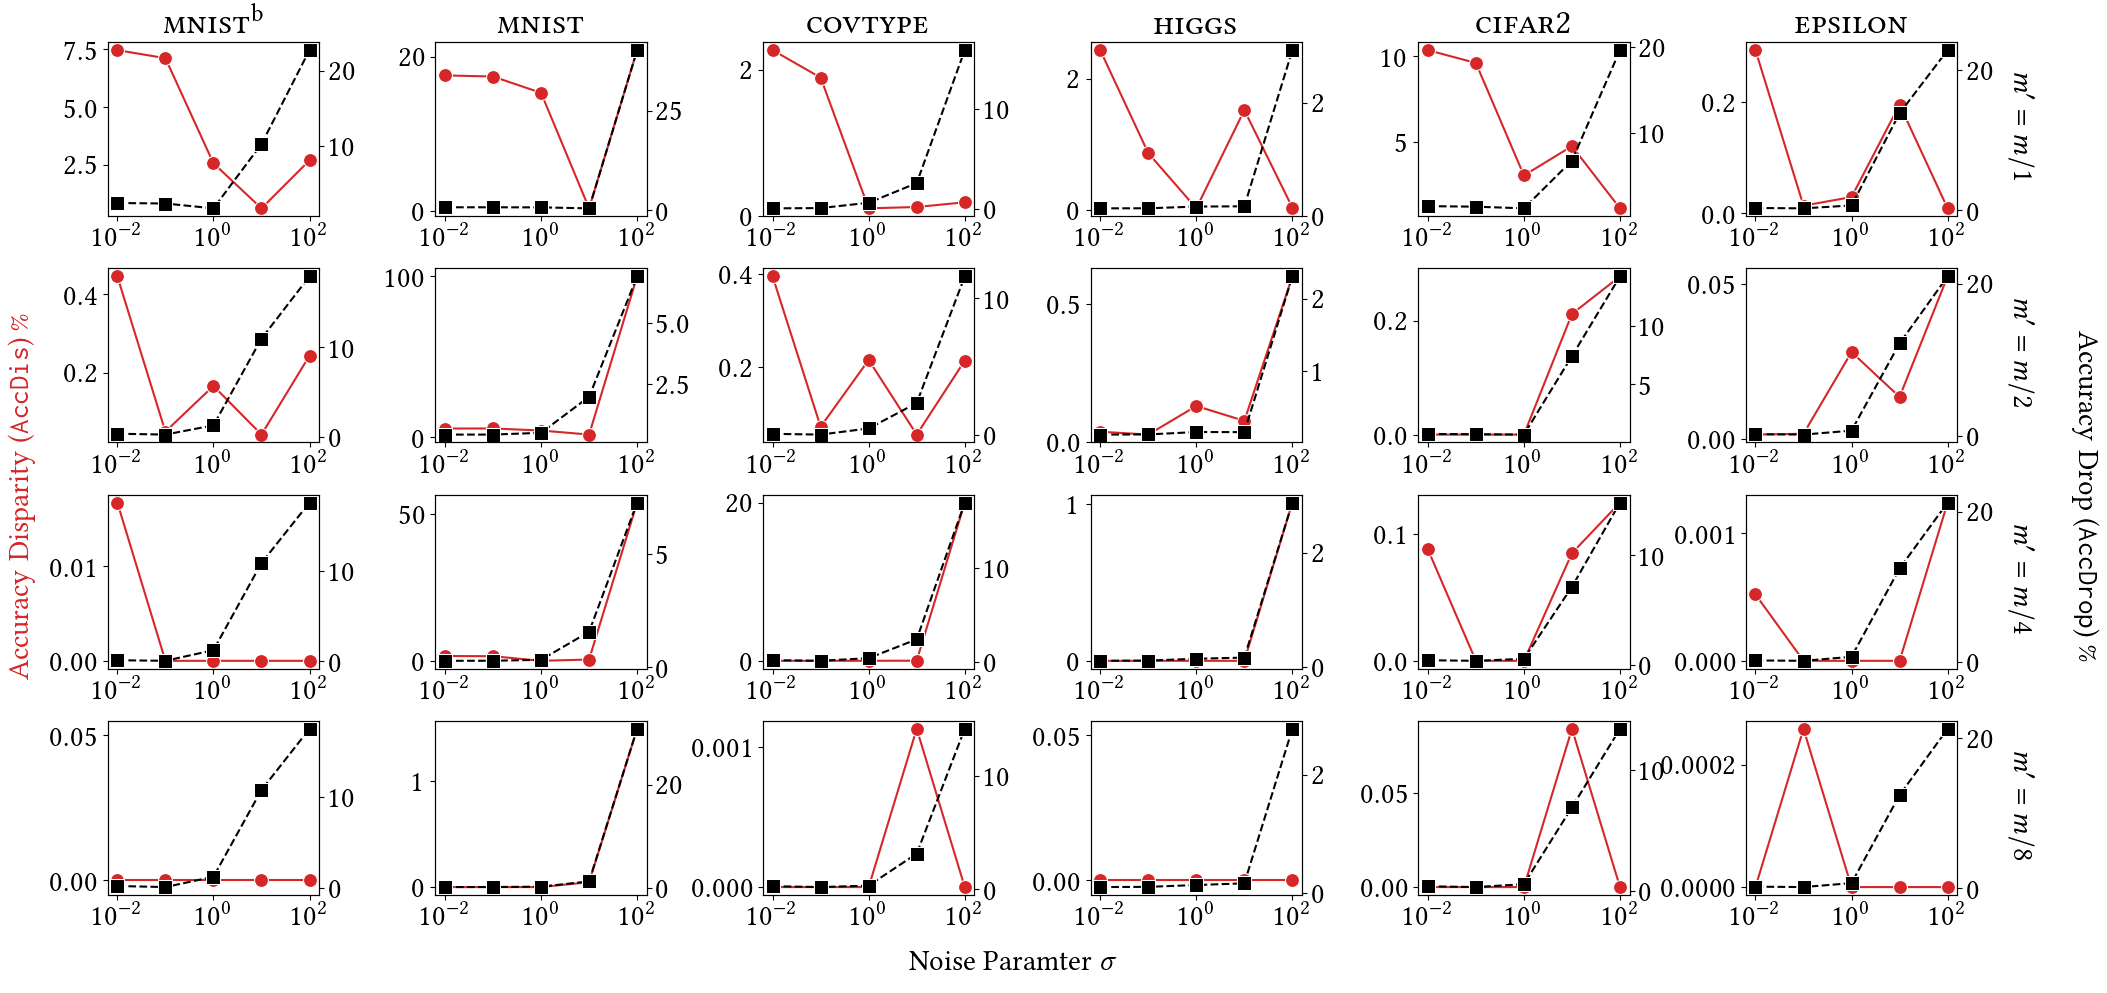

In [6]:
scale = {k:v*3 for k,v in get_default(inc=1).items()}
new_rc_params.update(scale)
mpl.rcParams.update(new_rc_params)
plot_unlearning_appendix(results_dir,method="gol",remove_ratio_idx=2,save_fig=save,latex=True,fig_width_pt=fig_width_pt,scale=3)